### EJERCICIO 1

__Ejercicio 1:__ Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.
__Nota:__ El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de _Euler_ que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

In [1]:
function runge(f,list,x0) #usamos el código del  método de Euler independiente de la dimensión.
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
         t = i*h
        k1=f(x,t)  
        k2=f(x+(h/2)*k1,t+(h/2))
        k3=f(x+(h/2)*k2,t+(h/2))
        k4=f(x+h*k3,t+h)
        x=x+(h/6)*(k1+2k2+2k3+k4)
    
        push!(listx,x) 
     end
     return listx
end

runge (generic function with 1 method)

In [2]:
f(x,t)=[x[2], -1.0*x[1]-1.0*x[2]] #ecuación dif. del oscilador amortiguado 

f (generic function with 1 method)

In [3]:
list=0:0.1:10; 
vector=runge(f,list,[0,1]); #condiciones iniciales

In [4]:
listx1r=map(x->x[1],vector);
listx2r=map(x->x[2],vector);

In [5]:
using PyPlot

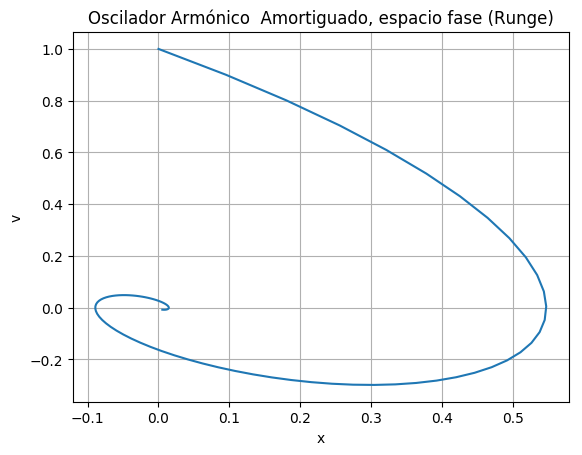

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [6]:
plot(listx1r,listx2r)

legend()
 xlabel("x")
    ylabel("v")
    title("Oscilador Armónico  Amortiguado, espacio fase (Runge)")
    grid("on")
show(); 

In [7]:
function euler(f,list,x0) #usamos el código del  método de Euler independiente de la dimensión.
    x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

euler (generic function with 1 method)

In [8]:
f(x,t)=[x[2], -1.0*x[1]-1.0*x[2]]

f (generic function with 1 method)

In [9]:
list=0:0.1:10; 
vector=euler(f,list,[0,1]);

In [10]:
listx1e=map(x->x[1],vector);
listx2e=map(x->x[2],vector);

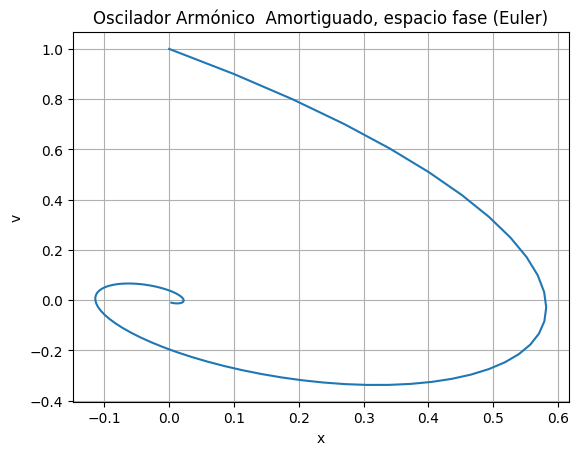

In [11]:
plot(listx1e,listx2e)

legend()
 xlabel("x")
    ylabel("v")
    title("Oscilador Armónico  Amortiguado, espacio fase (Euler)")
    grid("on")
show(); 

Al graficar ambos espacios obtenemos: 

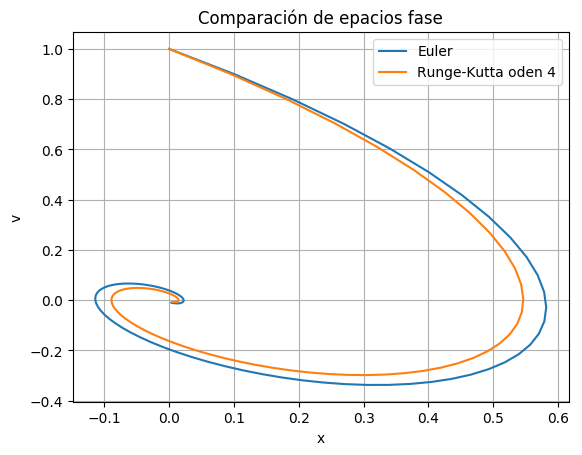

In [12]:
plot(listx1e,listx2e,label=("Euler"))
plot(listx1r,listx2r,label=("Runge-Kutta oden 4"))
legend()
 xlabel("x")
    ylabel("v")
    title("Comparación de epacios fase")
    grid("on")
show(); 

Observamos que en este caso del oscilador amortiguado para él método de Euler la trayectoria en el espacio fase ya se va a donde debería y ya no sucede lo de la clase pasada respecto a formar una trayectoria abierta en para el oscilador armónico simple.

### EJERCICIO 2

__Ejercicio 2:__ Resolver el péndulo simple:
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

In [13]:
function runge(f,list,x0) #usamos el código del  método de Euler independiente de la dimensión.
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
         t = i*h
        k1=f(x,t)  
        k2=f(x+(h/2)*k1,t+(h/2))
        k3=f(x+(h/2)*k2,t+(h/2))
        k4=f(x+h*k3,t+h)
        x=x+(h/6)*(k1+2k2+2k3+k4)
    
        push!(listx,x) 
     end
     return listx
end

runge (generic function with 1 method)

In [14]:
f1(x,t)=[x[2], -1.0*sin(x[1])] #ecuación dif. del péndulo simple.

f1 (generic function with 1 method)

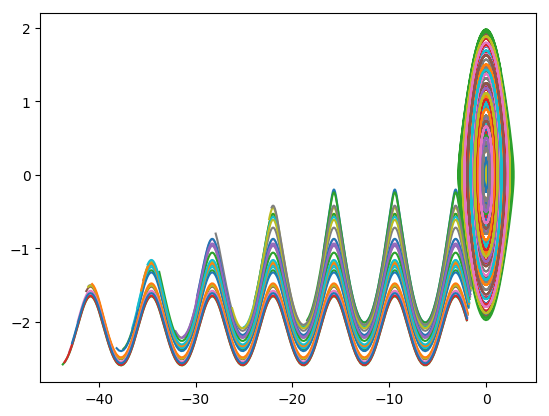

In [85]:
   #para distintas condiciones iniciales.
for i in 1:100
  list=-10:0.1:10;
      w=2*(rand(1)-1)
    vector=runge(f1,list,[w,w+0.01]);
    listx15r=map(x->x[1],vector);
listx25r=map(x->x[2],vector);
    plot(listx15r,listx25r)
end

__Ejercicio 3:__ Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [17]:
function runge_kutta(f,xo,to,tf,h) #Condiciones de la función
    listx = [xo]
    listt=linspace(to,tf,(tf-to)/h)#Rango para los valores de t
    y=xo
    for i in 1:length(listt)-1 #ciclo for para el llenado de las relaciones del método de Runge_Kutta orden 4
        k1=f(y,listt[i])  
        k2=f(y+(h/2)*k1,listt[i]+(h/2))
        k3=f(y+(h/2)*k2,listt[i]+(h/2))
        k4=f(y+h*k3,listt[i]+h)
        y=y+(h/6)*(k1+2k2+2k3+k4)
        push!(listx,y) #llenado de la lista de las x con los valores obtenidos con el método iterativo
    end
    return listx 
end

runge_kutta (generic function with 1 method)

In [18]:
f2(x,t)=x^2-1

f2 (generic function with 1 method)

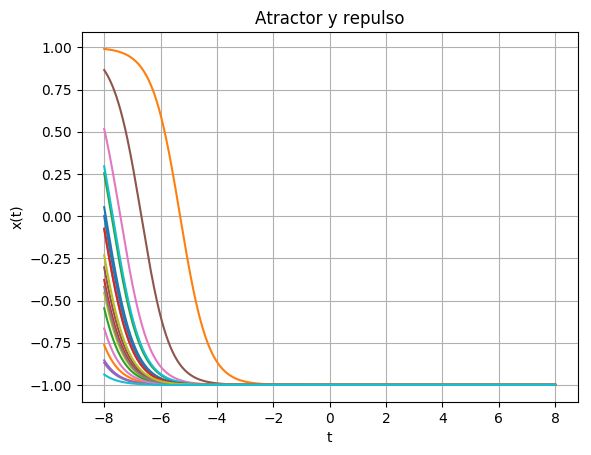

In [80]:
t=linspace(-8,8.0,16.0/0.01)
for i in 1:20
    ω=2*rand(1)-1
    y=runge_kutta(f2,ω[1],-8,8.0,0.01)
    plot(t,y)
     xlabel("t")
    ylabel("x(t)")
    title("Atractor y repulsor")
    grid("on")
show(); 
end



Notamos que el punto 1 es un repulso y el -1 es un atractor

__Ejercicio 4:__ También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [73]:
f3(x,t)=x^2

f3 (generic function with 1 method)

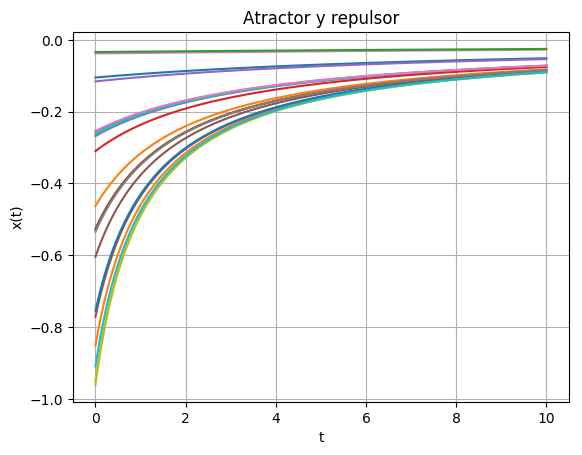

In [83]:
t=linspace(0,10.0,10.0/0.01)
for i in 1:20
    ω=1*rand(1)-1
    y=runge_kutta(f3,ω[1],0,10.0,0.01)
    plot(t,y)
     xlabel("t")
    ylabel("x(t)")
    title("Atractor y repulsor")
    grid("on")
show(); 
end


El punto cero es un atractor 